In [5]:
%pip install pyqt5

  Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl.metadata (2.1 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata (552 bytes)
Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl (6.9 MB)
Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
   ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
   ------------- -------------------------- 20.5/59.0 kB 320.0 kB/s eta 0:00:01
   --------------------------- ------------ 41.0/59.0 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 59.0/59.0 kB 443.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
%matplotlib qt

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Load the data
data = pd.read_csv('../data/data.csv')

# Select features relevant to socioeconomic and health conditions
features = [
    'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
    'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
    'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years',
    'Schooling', 
]
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN with initial parameters
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# Count number of clusters and outliers
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_outliers = list(clusters).count(-1)

# Use PCA to reduce the data to 3 dimensions for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate 13 distinct colors from Matplotlib's 'tab20' colormap
colormap = cm.get_cmap('tab20', 13)  # Get a colormap with 13 distinct colors
colors = [colormap(i) for i in range(13)]

# Plot non-outliers (clusters)
for cluster in set(clusters):
    if cluster == -1:
        # Plot outliers in red
        ax.scatter(X_pca[clusters == -1, 0], X_pca[clusters == -1, 1], X_pca[clusters == -1, 2], 
                   color='red', label='Outliers', s=20, edgecolor='k')
    else:
        # Plot each cluster with a unique color from the colormap
        ax.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], X_pca[clusters == cluster, 2], 
                   color=colors[cluster % 13], label=f'Cluster {cluster}', s=20)

# Set plot title and legend
ax.set_title(f'DBSCAN Clustering\nClusters: {n_clusters}, Outliers: {n_outliers}')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()


C:\Users\Malin Haugland Høli\AppData\Local\Temp\ipykernel_28972\1574984801.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20', 13)  # Get a colormap with 13 distinct colors


In [103]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is the original DataFrame and 'clusters' contains the DBSCAN cluster labels
data['Cluster'] = clusters

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create an empty DataFrame to hold the normalized features
normalized_data = pd.DataFrame()

# Apply Min-Max scaling to each feature within each cluster (excluding outliers)
for cluster in data['Cluster'].unique():
    if cluster != -1:  # Skip outliers
        # Select the data for the current cluster
        cluster_data = data[data['Cluster'] == cluster][features]
        
        # Scale the features to the range [0, 1] for the current cluster
        # cluster_data_scaled = pd.DataFrame(scaler.fit_transform(cluster_data), columns=features)

        cluster_data_scaled = cluster_data
        
        # Add the cluster label back to the scaled data for later reference
        cluster_data_scaled['Cluster'] = cluster
        
        # Append the scaled data to the normalized_data DataFrame
        normalized_data = pd.concat([normalized_data, cluster_data_scaled])

# Calculate the mean of each scaled feature within each cluster
cluster_summary_scaled = normalized_data.groupby('Cluster')[features].mean()

# divide by the max mean value of each feature
for feature in features:
    max_value = cluster_summary_scaled[feature].max()
    cluster_summary_scaled[feature] = cluster_summary_scaled[feature] / max_value

# print amount per cluster
for cluster in data['Cluster'].unique():
    print(f"Cluster {cluster}: {len(data[data['Cluster'] == cluster])}")

# Calculate the mean of each feature for outliers, for comparison
outliers_data = data[data['Cluster'] == -1][features]
outliers_data_scaled = pd.DataFrame(scaler.fit_transform(outliers_data), columns=features)
outliers_summary_scaled = outliers_data_scaled.mean()

# Display the normalized cluster summary
print("Cluster Feature Scales (0-1):")
print(cluster_summary_scaled)

print("\nOutlier Feature Scales (0-1):")
print(outliers_summary_scaled)


Cluster 0: 2648
Cluster 1: 15
Cluster 2: 15
Cluster 13: 16
Cluster -1: 62
Cluster 3: 16
Cluster 4: 7
Cluster 5: 5
Cluster 6: 6
Cluster 7: 16
Cluster 8: 22
Cluster 9: 5
Cluster 10: 12
Cluster 12: 14
Cluster 11: 5
Cluster Feature Scales (0-1):
         Infant_deaths  Under_five_deaths  Adult_mortality  \
Cluster                                                      
0             0.240404           0.202810         0.324647   
1             0.438079           0.348968         0.357684   
2             0.220088           0.170936         0.371950   
3             0.505897           0.486643         0.960456   
4             0.425354           0.396701         0.568178   
5             0.784700           0.853488         0.719657   
6             1.000000           1.000000         0.674163   
7             0.144231           0.107965         0.173576   
8             0.601476           0.479331         0.400186   
9             0.864088           0.752379         0.591863   
10            

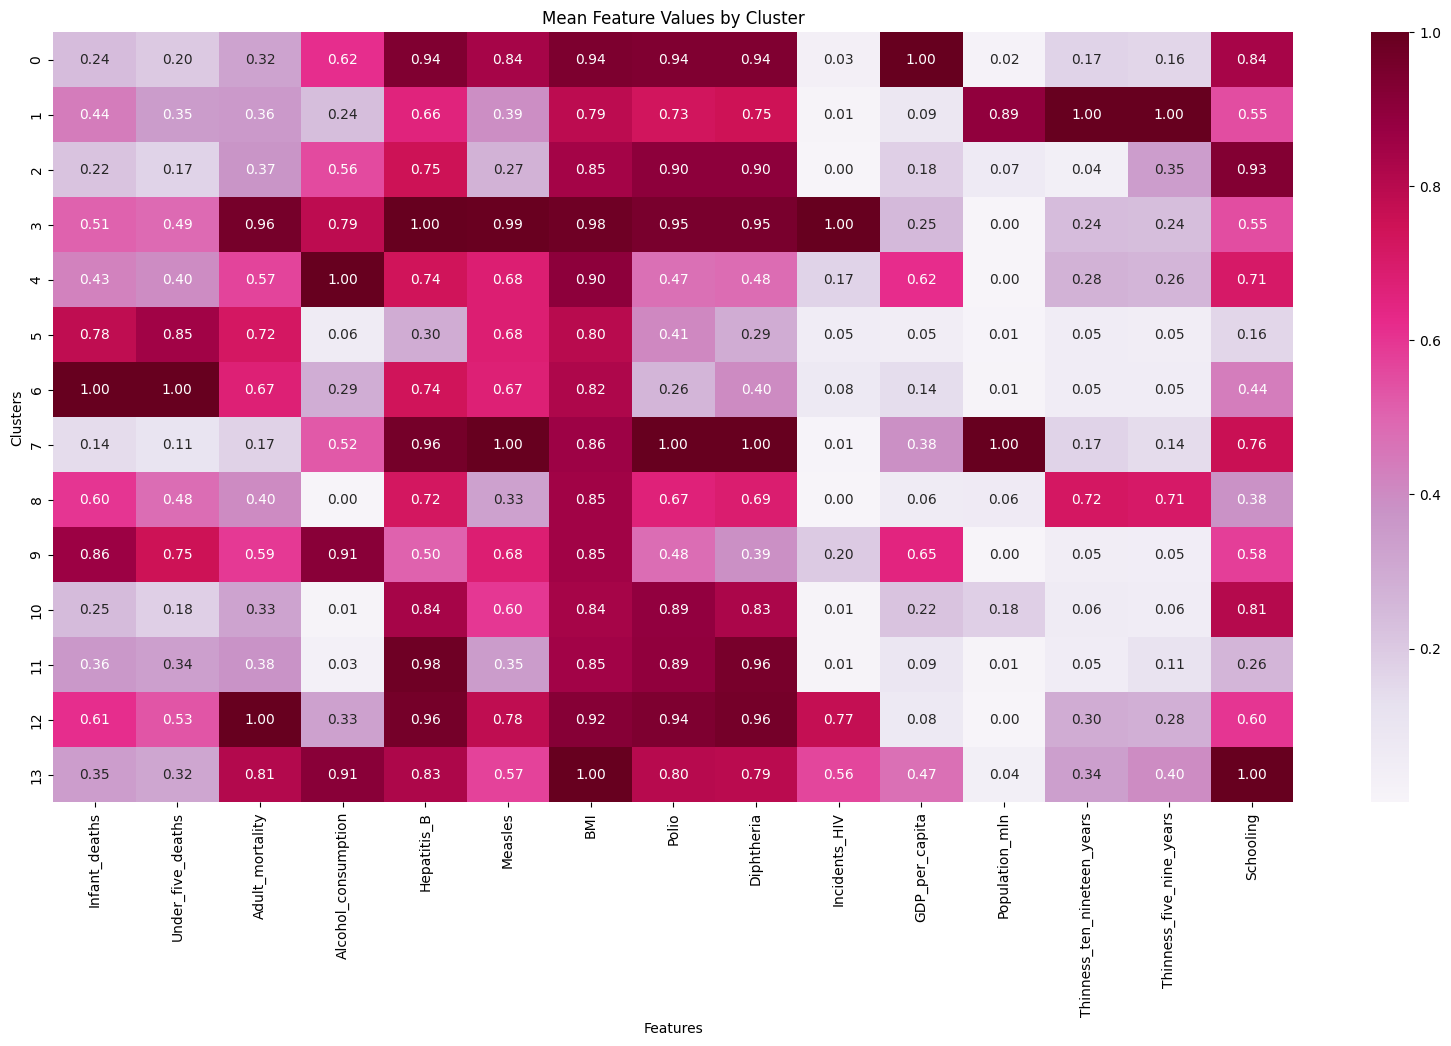

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the mean feature values across clusters using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_summary_scaled, cmap="PuRd", annot=True, fmt=".2f")
plt.title("Mean Feature Values by Cluster")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()
